# Surfinpy

#### Tutorial 3 - Pressure

Chemical potential can be converted to pressure values using

\begin{align}
P & = \frac{\mu_O}{k_B T} ,
\end{align}

where P is the pressure, $\mu$ is the chemical potential of oxygen, $k_B$ is the Boltzmnann constant and T is the temperature. 

In [1]:
from surfinpy import mu_vs_mu
from surfinpy import utils as ut
from surfinpy import data

In [2]:
Oxygen_exp = ut.fit_nist("O2.txt")[298]
Water_exp = ut.fit_nist("H2O.txt")[298]
Oxygen_corrected = (-9.08 + -0.86 + Oxygen_exp) / 2 
Water_corrected = -14.84 + 0.55 + Water_exp

In [3]:
bulk = data.ReferenceDataSet(cation = 1, anion = 2, energy = -780.0, funits = 4)

pure = data.DataSet(cation = 24, x = 48, y = 0, area = 60.0, energy = -575.0, label = "Stoich", nspecies = 1)
H2O = data.DataSet(cation = 24, x = 48, y = 2, area = 60.0, energy = -612.0, label = "1 Water", nspecies = 1)
H2O_2 = data.DataSet(cation = 24, x = 48, y = 4, area = 60.0, energy = -640.0, label = "2 Water", nspecies = 1)
H2O_3 = data.DataSet(cation = 24, x = 48, y = 8, area = 60.0, energy = -676.0, label = "3 Water", nspecies = 1)
Vo = data.DataSet(cation = 24, x = 46, y = 0, area = 60.0, energy = -558.0, label = "Vo", nspecies = 1)
H2O_Vo_1 = data.DataSet(cation = 24, x = 46, y = 2, area = 60.0, energy = -594.0, label = "Vo + 1 Water", nspecies = 1)
H2O_Vo_2 = data.DataSet(cation = 24, x = 46, y = 4, area = 60.0, energy = -624.0, label = "Vo + 2 Water", nspecies = 1)
H2O_Vo_3 = data.DataSet(cation = 24, x = 46, y = 6, area = 60.0, energy = -640.0, label = "Vo + 3 Water", nspecies = 1)
H2O_Vo_4 = data.DataSet(cation = 24, x = 46, y = 8, area = 60.0, energy = -670.0, label = "Vo + 4 Water", nspecies = 1)


data = [pure, Vo, H2O, H2O_Vo_1, H2O_2, H2O_Vo_2, H2O_3, H2O_Vo_3,  H2O_Vo_4]


In [4]:
deltaX = {'Range': [ -12, -6],  'Label': 'O'}
deltaY = {'Range': [ -19, -12], 'Label': 'H_2O'}

In [5]:
system =  mu_vs_mu.calculate(data, bulk, deltaX, deltaY, x_energy=Oxygen_corrected, y_energy=Water_corrected)

As before we can generate a basic plot of oxygen chemical potential vs water chemical potential at 298 K

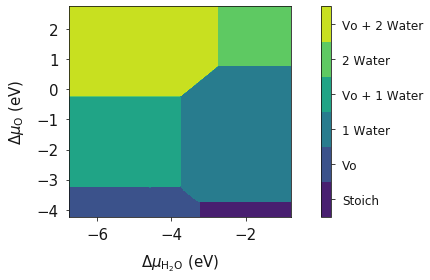

In [6]:
system.plot_phase(temperature=298)

We can also generate the same plot but with the $\mu$ values converted to pressure.

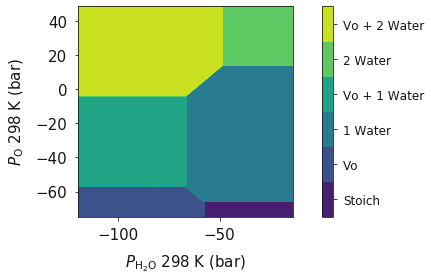

In [7]:
system.plot_pressure(temperature=298)

Finally, we can also combine these two plots into one

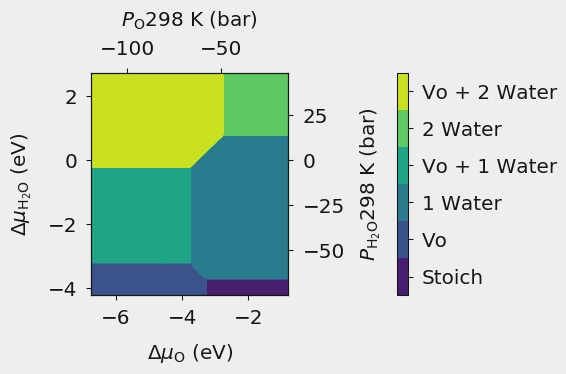

In [8]:
system.plot_mu_p(temperature=298)